# Importing Libraries

In [2]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt
import numpy as np

# Showing images

The function/method cv2.imshow() lets us display an image in a window which fits itself to the size of the image.

In [2]:
#load
img1 =cv2.imread('spiderman.jpeg', cv2.IMREAD_COLOR) #default flag. neglect transparency
img2 =cv2.imread('spiderman.jpeg', cv2.IMREAD_GRAYSCALE) #greyscale
img3 =cv2.imread('spiderman.jpeg', cv2.IMREAD_UNCHANGED) #include alpha channel

# show, wait, destroy
cv2.imshow('Python1',img1)
cv2.imshow('Python2',img2)
cv2.imshow('Python3',img3)
cv2.waitKey(0) # press any key to destroy all windows

#cv2.destroyWindow('Python1') #make sure window closes cleanly
cv2.destroyAllWindows() #destroy all windows


# Writing to a new file / displaying using matploblib

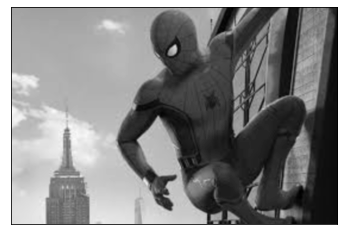

In [9]:
#write to a new file
cv2.imwrite('grey.png',img2)

#display using matplotlib
plt.imshow(img2,cmap='gray',interpolation='bicubic')
plt.xticks([]),plt.yticks([])
plt.show()


## Drawing 

In [46]:
#512,512 refers to the size, 3 refers to the BGR value
bg=np.ones((512,512,3))


#draw a line from 0,0 to 511,511, using 255,0,0 color (BGR), with 3 points of thickness
cv2.line(bg,(0,0),(511,511),(255,0,0),3)

#draw a rectangle given two corners, using 0,255,0 (BGR), with 2 points of thickness
cv2.rectangle(bg,(384,0),(510,128),(0,255,0),2)

#draw a circle with 447,63 as the centre, and 63 as the radius. -1 fills the circle
cv2.circle(bg,(447,63),63,(0,0,255),-1)

#coordinates refer to bottom left
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(bg,'text',(0,500),font,4,(0,0,0),4,cv2.LINE_AA)

cv2.imshow('drawing',bg)

cv2.waitKey(0)
cv2.destroyAllWindows() #destroy all windows



# Basic image operations

In [8]:
spidey=cv2.imread('spiderman.jpeg')
y,x=100,50
(b,g,r)=spidey[y,x] #Reading color values at y, x positions
b,g,r #Printing color values to screen

spidey[y,x]=(0,0,255) #Setting pixel color to red; BGR scheme
region_of_interest=spidey[y:y+50,x:x+50] #Region of interest at (x,y) of dimensions 50x50
cv2.imshow('img',spidey)

cv2.waitKey(0)
cv2.destroyAllWindows() #destroy all windows


# Edge detection using Canny

In [10]:
edge=cv2.imread('spiderman.jpeg')
cv2.imwrite('edge_spidey.jpg',cv2.Canny(edge,512,512))
cv2.imshow('edges',cv2.imread('edge_spidey.jpg'))

cv2.waitKey(0)
cv2.destroyAllWindows() #destroy all windows


# Face Detection
https://docs.opencv.org/3.1.0/d7/d8b/tutorial_py_face_detection.html#gsc.tab=0

In [30]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img=cv2.imread('me.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting it to grayscale
faces=face_cascade.detectMultiScale(spidey,1.3,5) #Performing the detection

for (x,y,w,h) in faces:
    spidey = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',spidey)

cv2.waitKey(0)
cv2.destroyAllWindows() #destroy all windows